In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Let us drop the columns Unnamed:0 as it is unnecessary

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Data Analysis

In [5]:
df.shape

(18249, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Let us change the Date column type from object to date type.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


We can see that the date column has datetime datatype. Now splitting the data into months and day

In [9]:
df['Month'] = df['Date'].dt.month

In [10]:
df['Day'] = df['Date'].dt.day

In [11]:
df.drop("Date",axis=1,inplace=True)

In [12]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [13]:
df.shape

(18249, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [15]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>]], dtype=object)

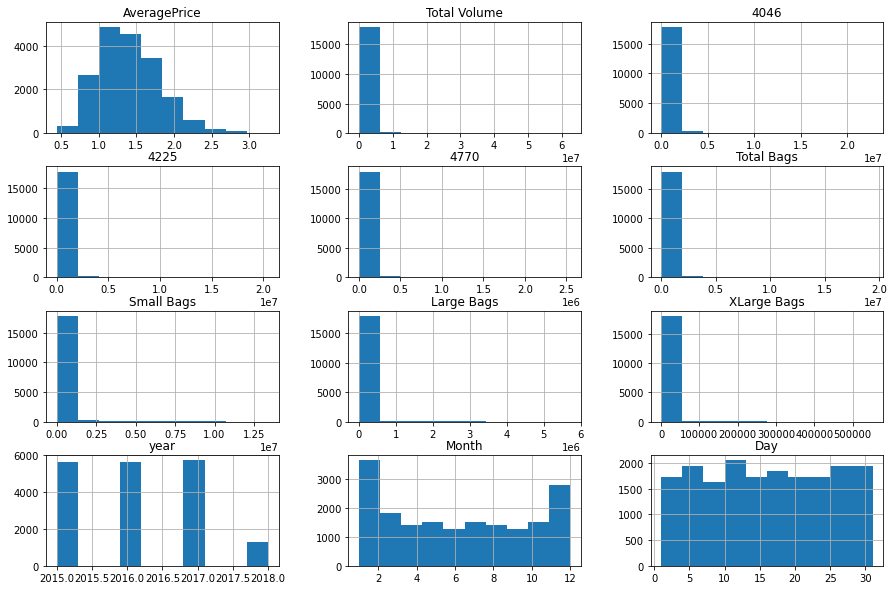

In [16]:
df.hist(figsize=(15,10))

Let us see the unique values of our target variable.

In [17]:
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [18]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64

In [19]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


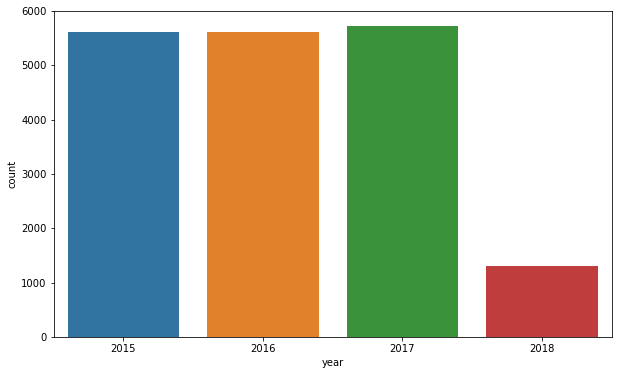

In [20]:
print(df['year'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df['year'])
plt.show()

From the above grapth we can see that the sale of Avacados was the highest in the year 2017, the years 2015 and 2016 had almost equal sales. The year 2018 had the least sales.

Let us now see how the data is distributed in our target 

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

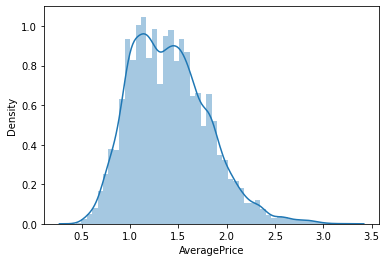

In [21]:
sns.distplot(df['AveragePrice'])

We can see that the data is normally distributed in the target.

# Univariate Analysis

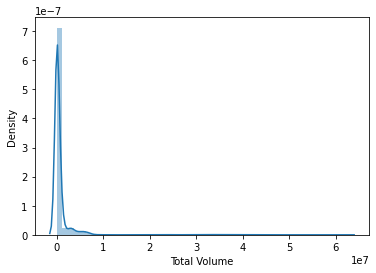

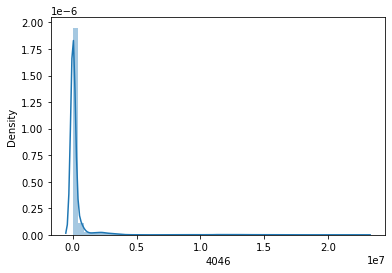

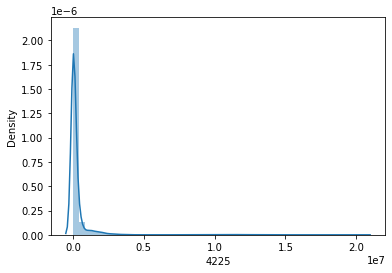

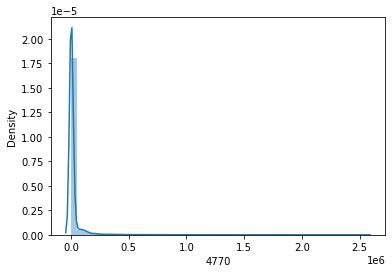

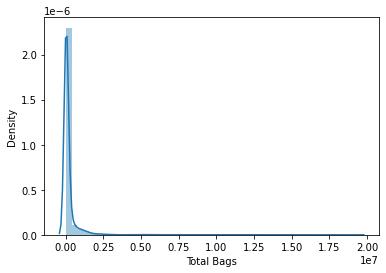

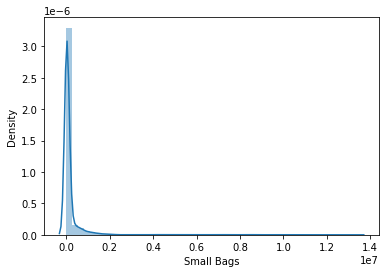

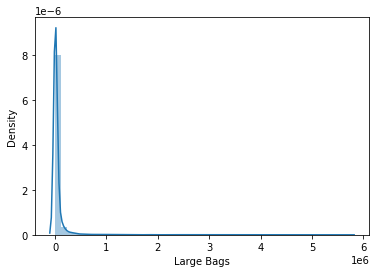

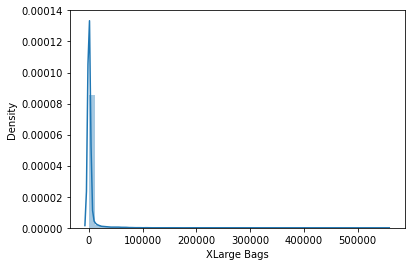

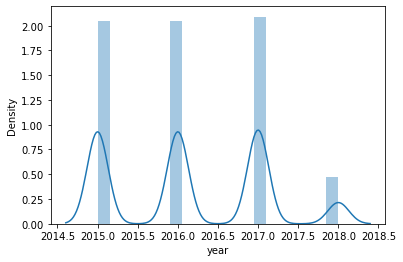

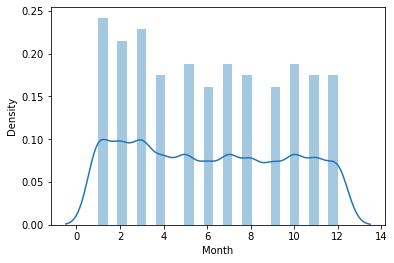

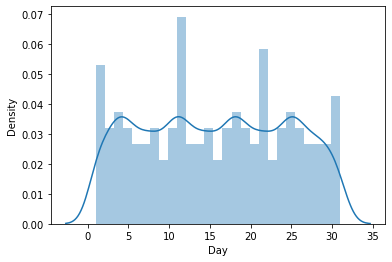

In [22]:
columns = ['Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year', 'Month', 'Day']
for i in columns:
    sns.distplot(df[i])
    plt.show()

We can see that most of the columns have skewed data

# Bivariate Analysis

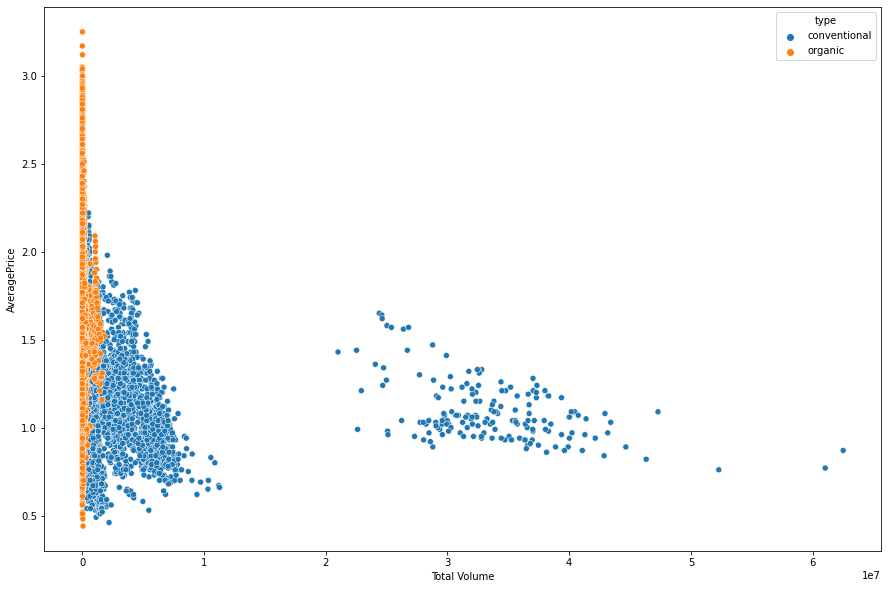

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(df['Total Volume'],df['AveragePrice'],hue=df['type'])
plt.show()

The scatterplot gives us the relationship between the total volume and average price with respect to type. All organic type of avacado lies in the zero volume and the average price is high for organic avacados. The conventional type avacado has the average price upto 2.3. The Average Price of the organic type avacados is higher than the conventional type.

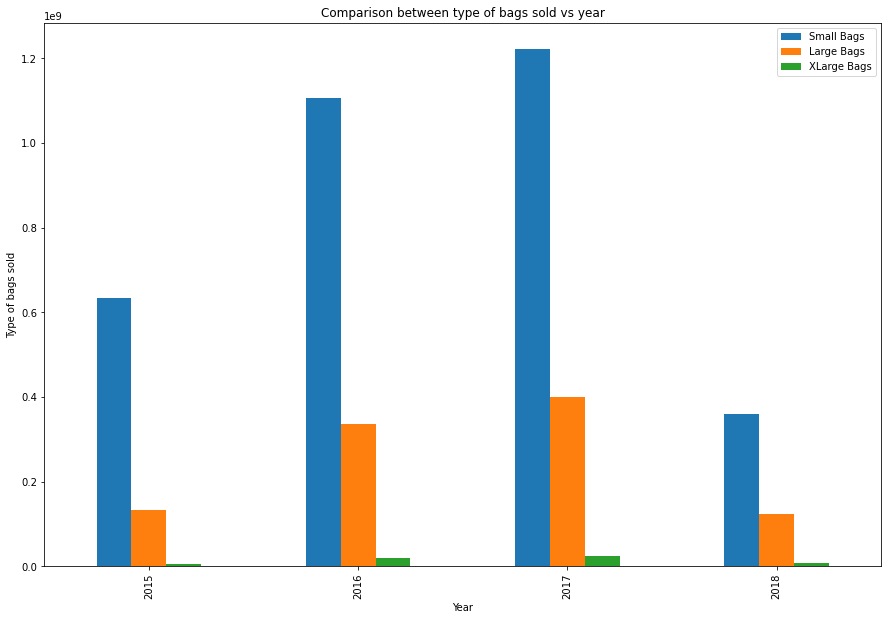

In [24]:
feature = df[['Small Bags','Large Bags','XLarge Bags']].groupby(df.year).sum()
feature.plot(kind='bar',figsize=(15,10))
plt.title("Comparison between type of bags sold vs year")
plt.xlabel('Year')
plt.ylabel("Type of bags sold")
plt.show()

From the above graph we can observe the following:
1. The maximum bags sold in all the years are Small Bags followed by Large Bags and XLarge Bags.
2. The sales of all kinds of bags is maximum in the year 2017.
3. Te maximum Small bags were sold in 2017 followed by 2016, 2015 and 2018.
4. The maximum Large Bags were sold in 2017 followed by 2016,2015 and then 2018.

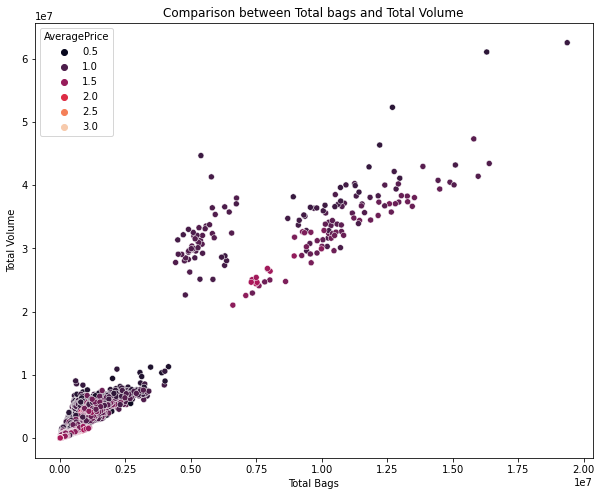

In [25]:
plt.figure(figsize=(10,8))
plt.title("Comparison between Total bags and Total Volume")
sns.scatterplot(data=df,x='Total Bags', y ='Total Volume',hue='AveragePrice',palette='rocket')
plt.show()

We can see a linear relation between Total bags and Total Volume. As the total bags sales increases with total volume, the price of avacado also increases.

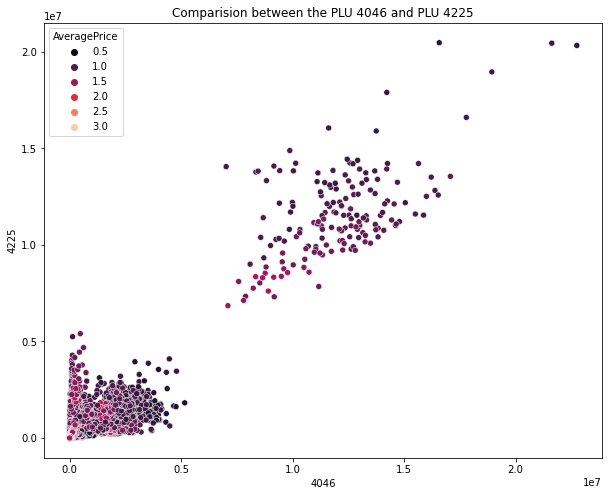

In [26]:
plt.figure(figsize=(10,8))
plt.title("Comparision between the PLU 4046 and PLU 4225")
sns.scatterplot(df["4046"],df["4225"],hue=df["AveragePrice"],palette="rocket")
plt.show()

There is a linear relationship between the total number of avacados with PLU 4046 and PLU 4225 sold. As the number of avacados with PLU 4046 and PLU 4225 inceases, the AveragePrice of the avcados increases aswell.

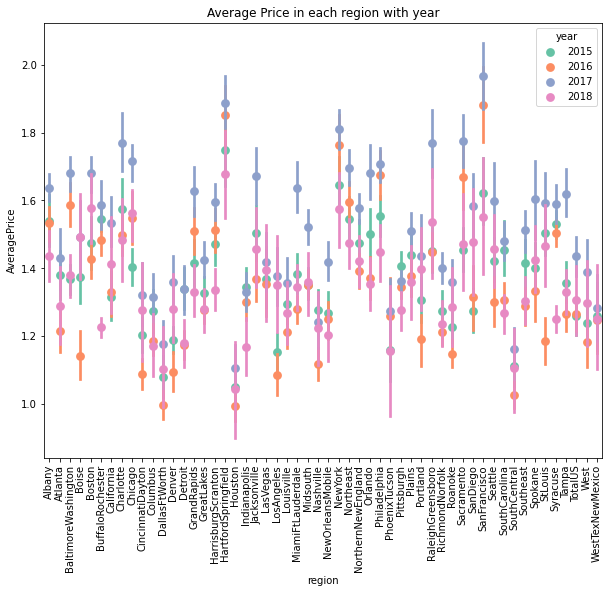

In [27]:
plt.figure(figsize=(10,8))
plt.title("Average Price in each region with year")
sns.pointplot(x=df['region'],y=df['AveragePrice'],hue=df['year'],join=False,palette='Set2')
plt.xticks(rotation=90)
plt.show()

The average price of the avacado is high in the region San Francisco followed by HartfordSpringfield in the year 2017. The demand of the fruit is the highest in the year 2017 and the last in the year 2018.

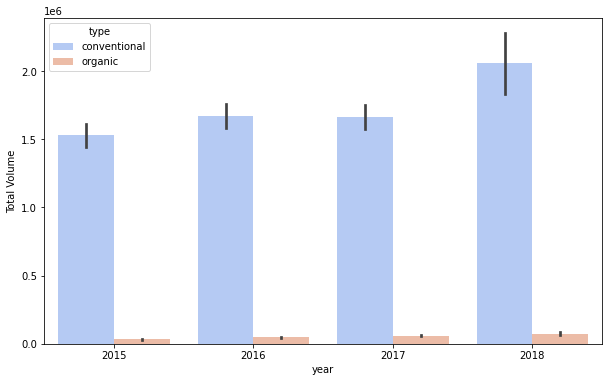

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['year'], y=df['Total Volume'], hue=df['type'], palette='coolwarm',ci=68)
plt.show()

As we can observe, the conventional type of avacados sold are higher every year when compared to the organic type. This could probably be because of the cost of organic avacados.

# Multivariate Analysis

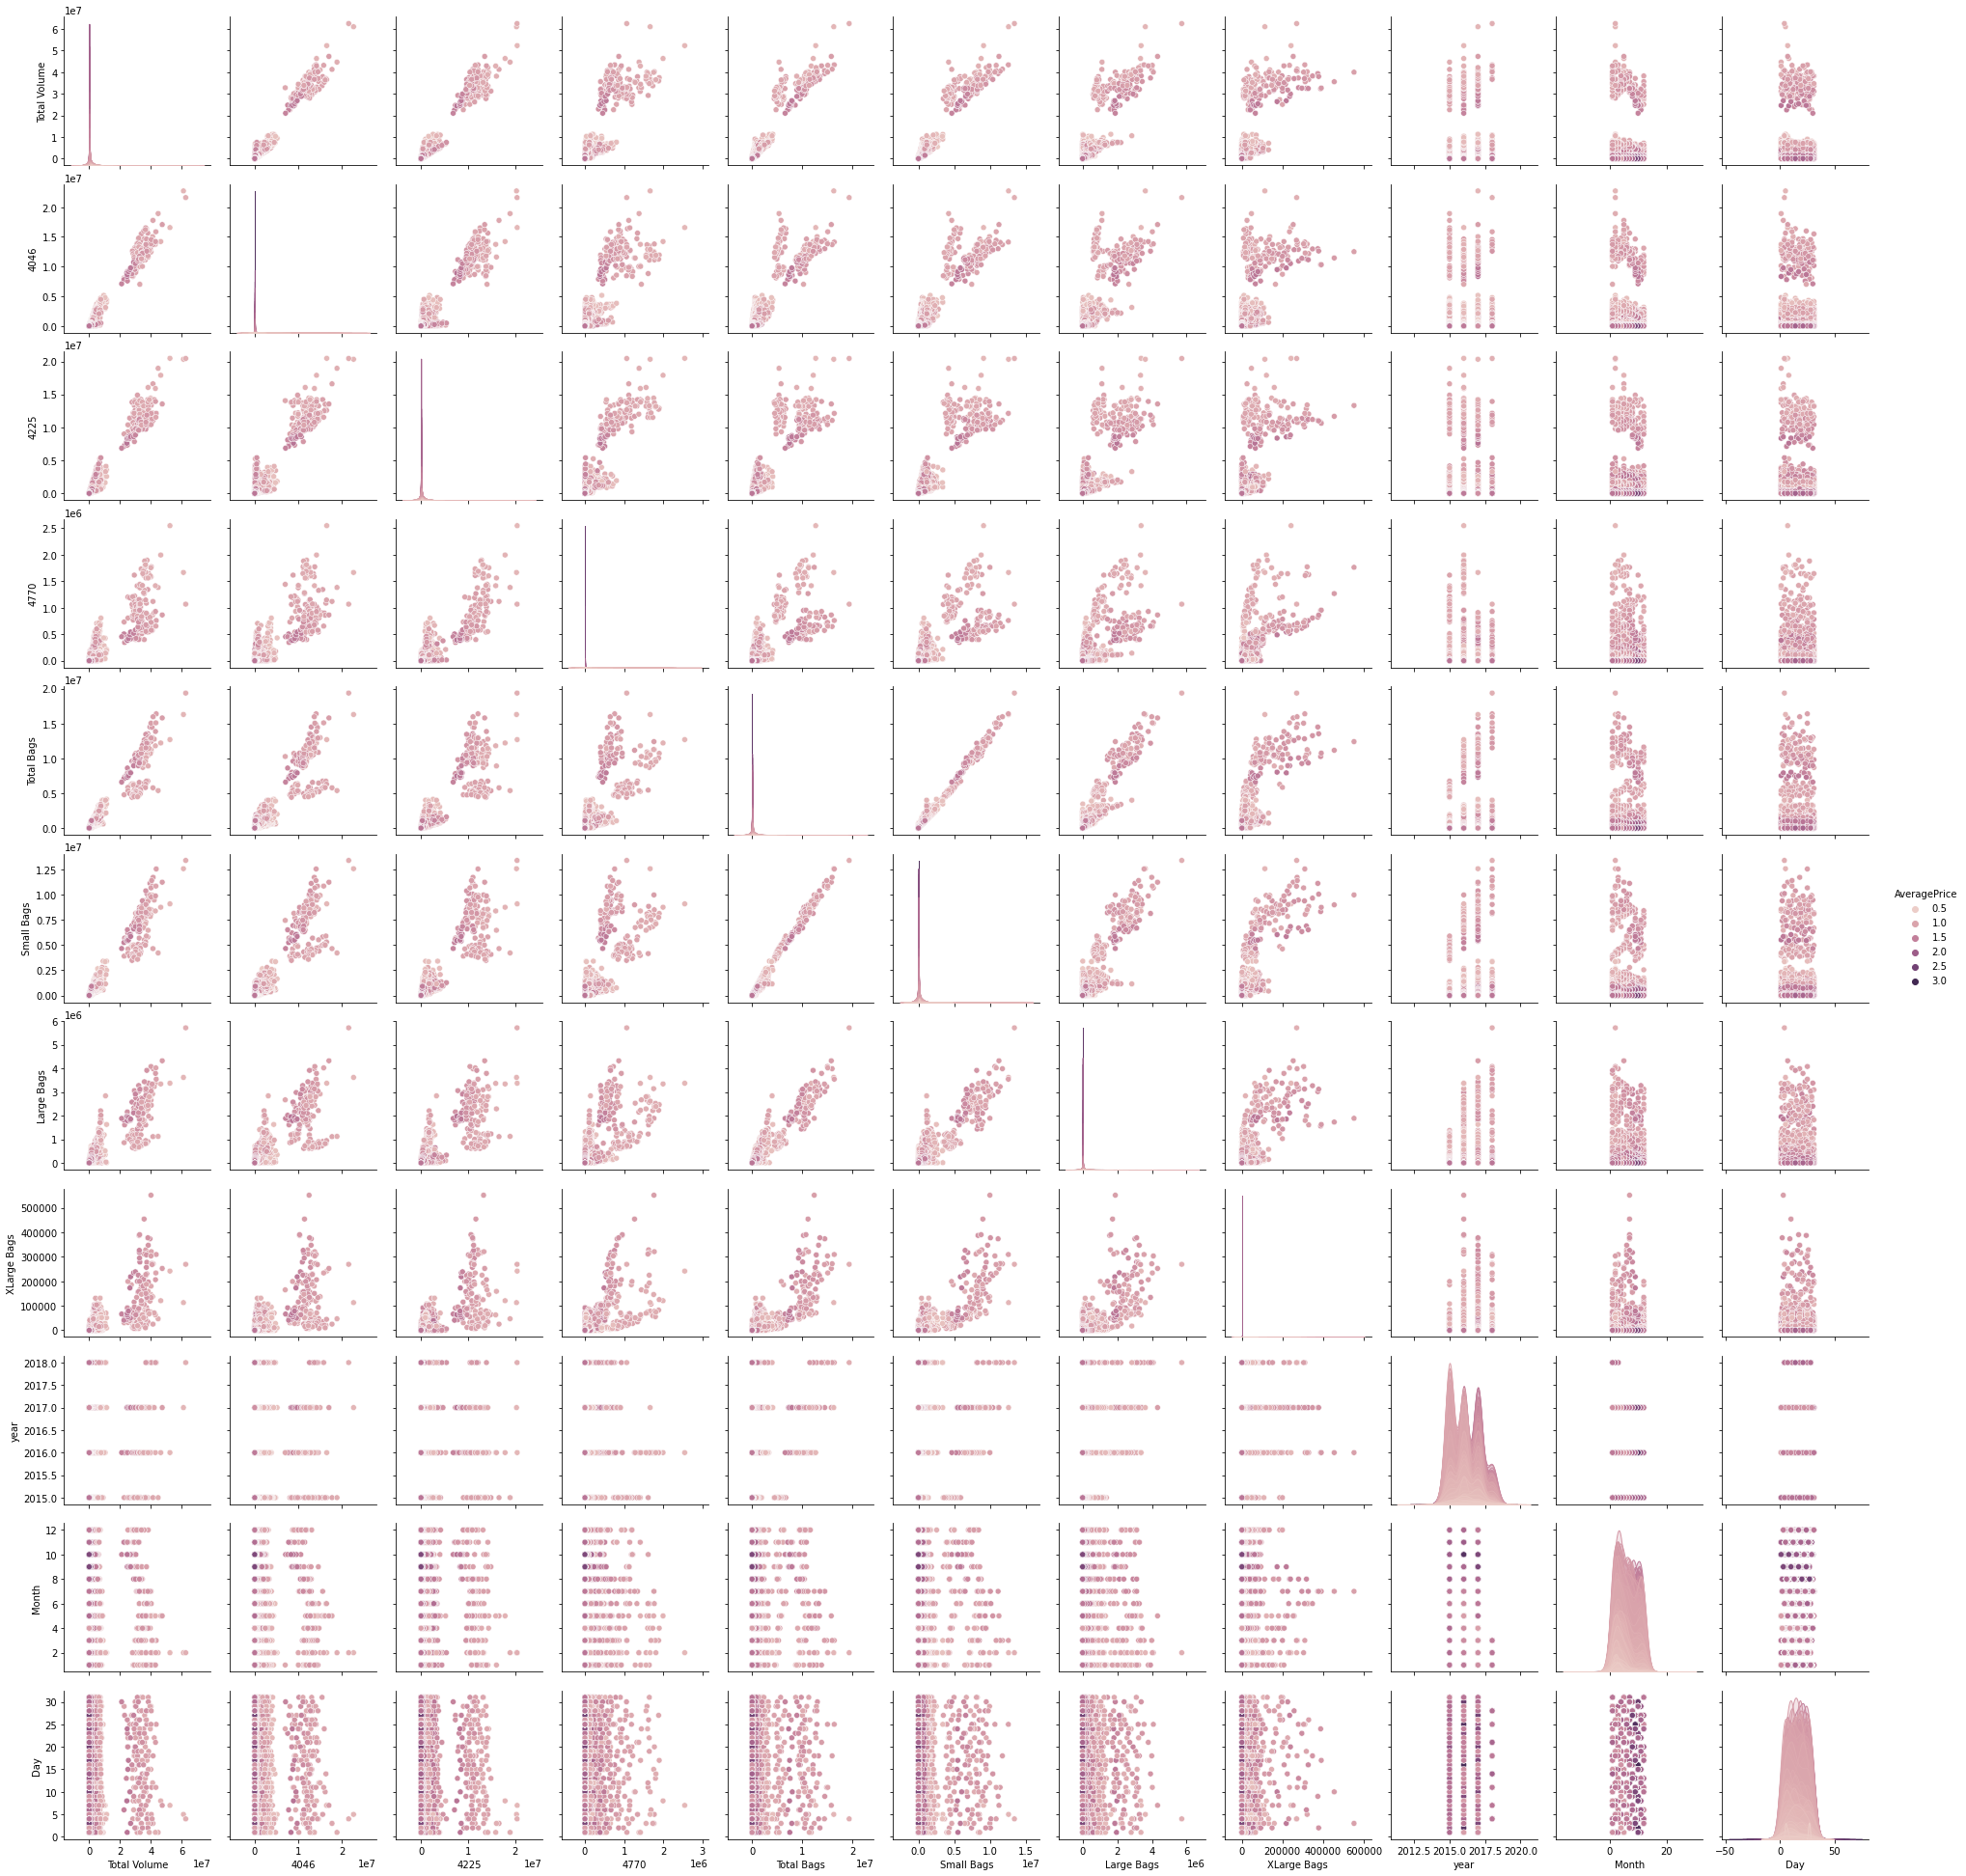

In [29]:
sns.pairplot(df,hue="AveragePrice")

# Outliers

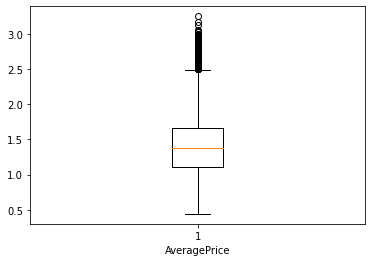

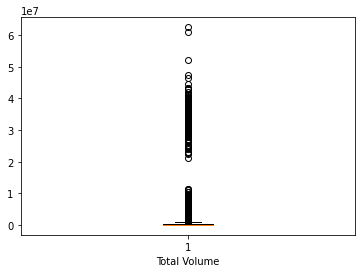

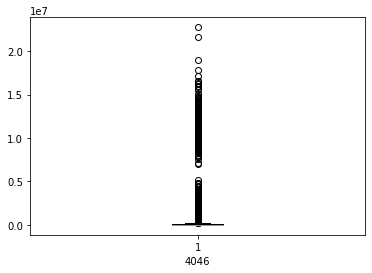

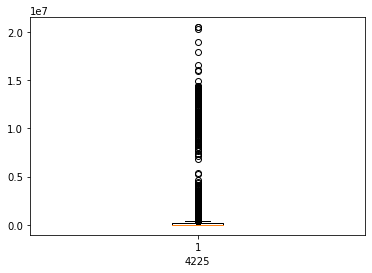

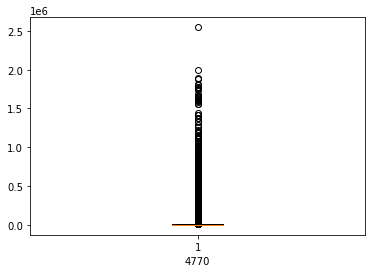

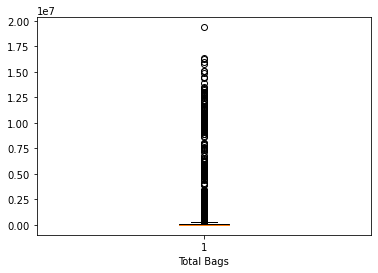

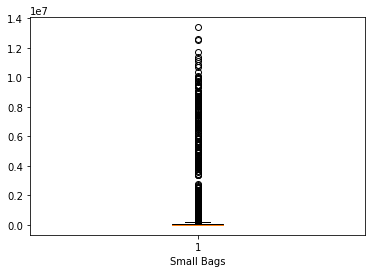

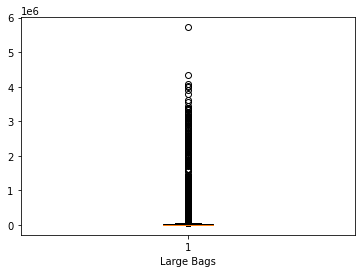

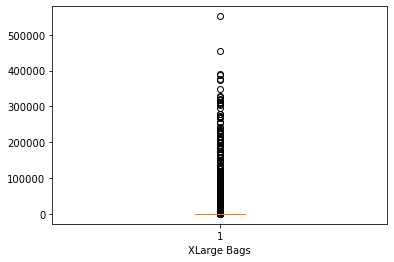

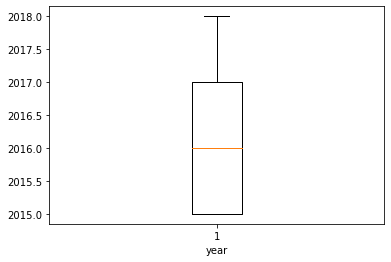

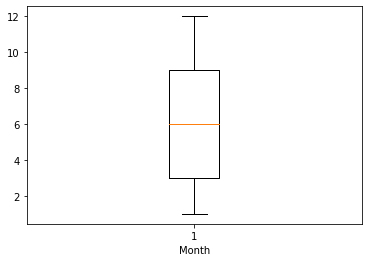

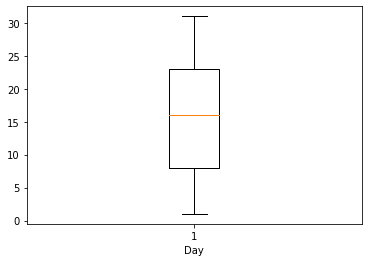

In [30]:
columns=['AveragePrice','Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'year', 'Month', 'Day']
for i in columns:
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

As we can observe from the above boxplots, there re large number of outliers except in the columns Year, month and day.

# Removing outliers using Zscore

In [31]:
from scipy.stats import zscore
columns = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
z = np.abs(zscore(columns))
new_df = df[(z<3).all(axis=1)]
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [32]:
df.shape, new_df.shape

((18249, 14), (17782, 14))

In [33]:
data_loss = (18249-17782)/18249*100
data_loss

2.55904433119623

We have lost 2.55% data(467 rows) after removing the outliers.

# Skewness

Remove skewness using yeo-johnson method

In [34]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [35]:
features = ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [36]:
new_df[features]=scaler.fit_transform(new_df[features].values)
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702,conventional,2015,Albany,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702,conventional,2015,Albany,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702,conventional,2015,Albany,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702,conventional,2015,Albany,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702,conventional,2015,Albany,11,29


In [37]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [86]:
new_df['XLarge Bags']=np.log1p(new_df['XLarge Bags'])
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.759172
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

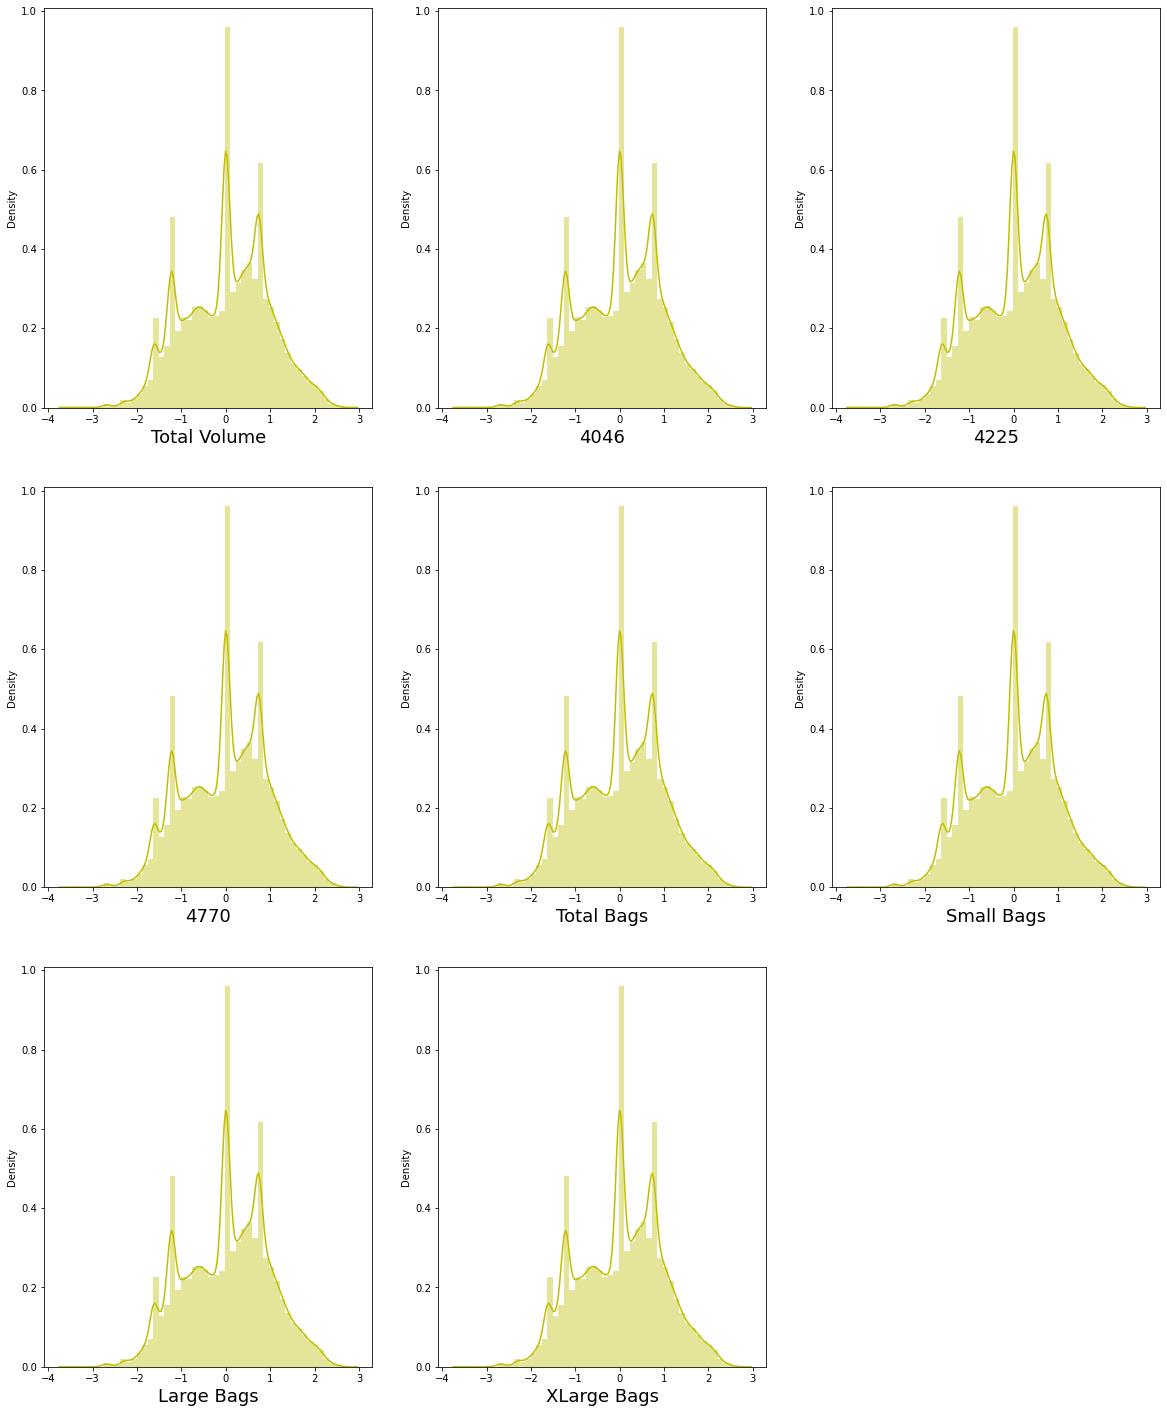

In [88]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1

for col in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[features],color='y')
        plt.xlabel(col,fontsize=18)
    plotnumber+=1
plt.show()

# Label Encoding

In [89]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ['type','region']
lbl = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(lbl.fit_transform)

In [90]:
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


# Correlation

In [91]:
new_df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.393422,0.608447,0.099910,0.010428,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.624636,-0.800828,0.076584,0.065709,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.571488,-0.725826,-0.002396,0.159390,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.577458,-0.747722,-0.004533,0.032273,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.612647,-0.780988,-0.051657,0.037805,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.606341,-0.725686,0.210924,0.065996,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.594502,-0.720466,0.185955,0.051985,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.447300,-0.500026,0.190295,0.086573,-0.016942,-0.000876
XLarge Bags,-0.393422,0.624636,0.571488,0.577458,0.612647,0.606341,0.594502,0.447300,1.000000,-0.673402,0.151992,-0.014904,0.022670,0.011907
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.673402,1.000000,0.007399,0.021970,-0.005044,-0.002469


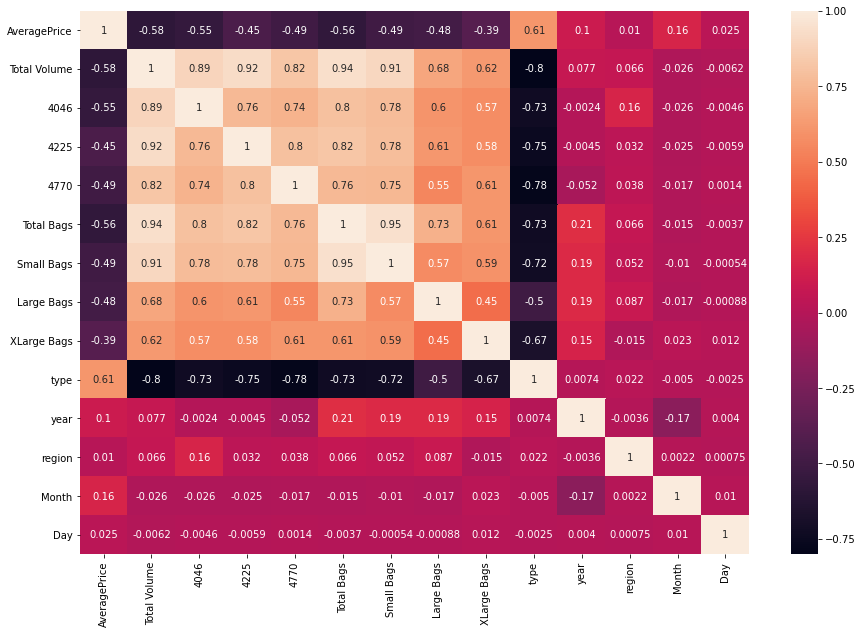

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

We can observe the following correlations:
1. Almost all features are highly negatively correlated with the target variable and few columns year, month andtype have positive coorelation with the target.
2. The features Day and region has no relation with the target,so we can drop these columns.
3. Almost all the features are correlated with each other which lead to multicolinearity problem which can be resolved using VIF.
4. Also most of the columns have no correlation with each other and have very less correlation

In [95]:
new_df.drop(columns=['Day','region'],axis=1,inplace=True)

In [96]:
new_df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'Month'],
      dtype='object')

# Seperating Target from features

In [97]:
x = new_df.drop('AveragePrice',axis=1)
y = new_df['AveragePrice']

# Standardizing the data using StandardScalar

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.690054,-1.026443,-1.214908,1.641434
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.690054,-1.026443,-1.214908,1.641434
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.690054,-1.026443,-1.214908,1.641434
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.690054,-1.026443,-1.214908,1.641434
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.690054,-1.026443,-1.214908,1.358706


# Multicolinearity Problem

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,51.779670,Total Volume
1,6.806491,4046
2,11.149686,4225
3,3.947671,4770
4,34.443794,Total Bags
5,16.625810,Small Bags
6,3.461998,Large Bags
7,2.049182,XLarge Bags
8,3.745557,type
9,1.384000,year


The features Total Volume, 4225, Total Bags, Small Bags have VIF >10, so let us drop the coluns with the highest VIF.

In [101]:
x.drop('Total Volume',axis=1, inplace =True)

In [102]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.546384,4046
1,4.271730,4225
2,3.932113,4770
3,24.478276,Total Bags
4,16.625573,Small Bags
5,3.418644,Large Bags
6,2.038688,XLarge Bags
7,3.513506,type
8,1.381352,year
9,1.051968,Month


In [103]:
x.drop('Total Bags',axis=1,inplace=True)

In [104]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.527490,4046
1,4.127318,4225
2,3.931824,4770
3,4.096832,Small Bags
4,1.864136,Large Bags
5,2.038582,XLarge Bags
6,3.510578,type
7,1.357157,year
8,1.051348,Month


Now all the values of VIF is less than 10, we have solved the multicolinearity problem.

# Model Building

In [105]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import r2_score

In [109]:
from sklearn.ensemble import RandomForestRegressor

maxAcc = 0
maxRS = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=.30,random_state=i)
    rff=RandomForestRegressor()
    rff.fit(x_train,y_train)
    pred = rff.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2_score is ",maxAcc,"at random_state",i)

Maximum r2_score is  0.8737537120662664 at random_state 99


In [110]:
#Creating new train test split
x_train,x_test,y_train,y_test = TTS(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [111]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Linear Regression

In [121]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_LR = lr.predict(x_test)
print("R2_score:",r2_score(y_test,pred_LR))

R2_score: 0.5052451036565699


# Descision Tree Regressor

In [122]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
print("r2_score:",r2_score(y_test,pred_dtr))

r2_score: 0.731799663341363


# Support Vector Regressor

In [123]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
print("r2_score:",r2_score(y_test,pred_svr))

r2_score: 0.7778038981894055


# Random Forest Regressor

In [124]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_RFR = rfr.predict(x_test)
print("R2_score :",r2_score(y_test,pred_RFR))

R2_score : 0.8722675300934893


# Stochastic Gradient Descent Regressor

In [125]:
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
pred_SGD = sgd.predict(x_test)
print("R2_score:",r2_score(y_test,pred_SGD))

R2_score: 0.5037692896968059


# KNN Regressor

In [126]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("R2_score:",r2_score(y_test,pred_knn))

R2_score: 0.858135841450482


# Gradient Boosting Regressor

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_GB = gb.predict(x_test)
print("R2_score:",r2_score(y_test,pred_GB))

R2_score: 0.7165364562722631


# Cross Validation Score

In [129]:
print("Cross_Validation_Score using Linear Regression",cross_val_score(lr,x,y,cv=5).mean())

Cross_Validation_Score using Linear Regression 0.09197411026443063


In [131]:
print("Cross_Validation_Score using Decision Tree Regressor",cross_val_score(dtr,x,y,cv=5).mean())

Cross_Validation_Score using Decision Tree Regressor -0.36477048119121924


In [132]:
print("Cross_Validation_Score using SVR",cross_val_score(svr,x,y,cv=5).mean())

Cross_Validation_Score using SVR 0.17976166316948256


In [133]:
print("Cross_Validation_Score using Random Forest Regressor",cross_val_score(rfr,x,y,cv=5).mean())

Cross_Validation_Score using Random Forest Regressor 0.18918824233867132


In [134]:
print("Cross_Validation_Score using Stochastic Gradient Descent Regressor",cross_val_score(sgd,x,y,cv=5).mean())

Cross_Validation_Score using Stochastic Gradient Descent Regressor 0.070911441713423


In [135]:
print("Cross_Validation_Score using KNN",cross_val_score(knn,x,y,cv=5).mean())

Cross_Validation_Score using KNN 0.07702570537005775


In [136]:
print("Cross_Validation_Score using Gradient Boosting",cross_val_score(gb,x,y,cv=5).mean())

Cross_Validation_Score using Gradient Boosting 0.3555467804869114


From the difference between R2 Score and cross validation score, we can see that KNN Regressor is the best fit.

# Hyperparameter Tuning

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
# KNeighbor Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance']}

In [139]:
GCV = GridSearchCV(KNN(),parameters,cv=5)

In [140]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [141]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [142]:
avacado = KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avacado.fit(x_train,y_train)
pred = avacado.predict(x_test)
print('R2_score :',r2_score(y_test,pred)*100)

R2_score : 87.715461877469


# Saving the model

In [144]:
import pickle
filename = 'Avacado.sav'
pickle.dump(avacado, open(filename, 'wb'))

In [145]:
loaded_model = pickle.load(open(filename, 'rb'))

# Prediction Results

In [147]:
a = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
df_final = pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_final

,Original,Predicted
0,1.60,1.397292
1,1.44,1.508108
2,2.82,2.579497
3,1.43,1.631139
4,1.49,1.431028
...,...,...
5330,1.60,1.604187
5331,2.23,1.455786
5332,1.72,1.656315
5333,1.19,1.146628


# TASK 2

In [148]:
df_region =pd.read_csv('avocado.csv')
df_region

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [149]:
df_region['region'].value_counts()

NorthernNewEngland     338
Columbus               338
LosAngeles             338
California             338
CincinnatiDayton       338
LasVegas               338
Albany                 338
West                   338
HartfordSpringfield    338
Northeast              338
Syracuse               338
Detroit                338
SouthCentral           338
Houston                338
Plains                 338
MiamiFtLauderdale      338
Portland               338
PhoenixTucson          338
GreatLakes             338
NewYork                338
SanDiego               338
Boston                 338
Midsouth               338
Jacksonville           338
Sacramento             338
SanFrancisco           338
Nashville              338
Southeast              338
GrandRapids            338
BaltimoreWashington    338
DallasFtWorth          338
SouthCarolina          338
StLouis                338
BuffaloRochester       338
Spokane                338
Philadelphia           338
Tampa                  338
T

# Let us label encode the target

In [153]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df_region['region'] = lbl.fit_transform(df_region['region'])

In [154]:
df_region['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

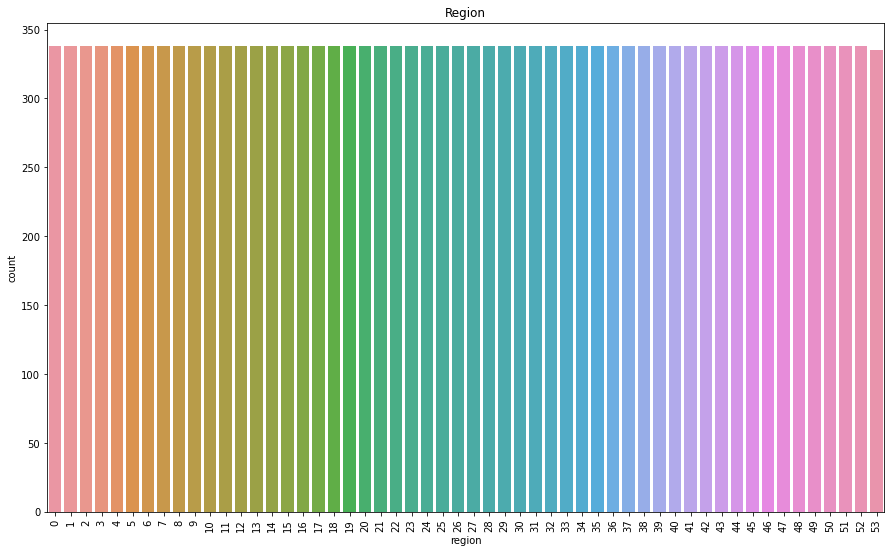

In [156]:
# Visualizing the region
plt.figure(figsize=(15,9))
sns.countplot(df_region['region'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

There are 53 regoins and the count of avacados are almost the same in all the regions.

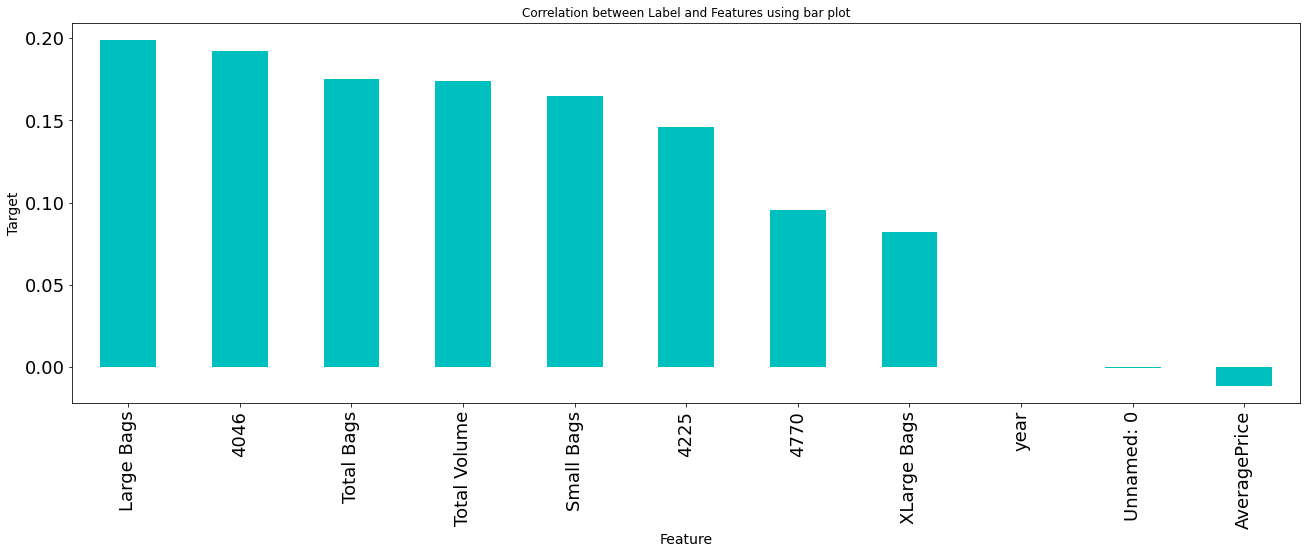

In [157]:
plt.figure(figsize=(22,7))
df_region.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c',fontsize=18)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between Label and Features using bar plot")
plt.show()

In [158]:
df_region.drop("Unnamed: 0",axis=1,inplace=True)
df_region.drop("year",axis=1,inplace=True)

In [159]:
df_region['Date'] = pd.to_datetime(df_region['Date'])

In [160]:
df_region['Month'] = df_region['Date'].dt.month
df_region['Day'] = df_region['Date'].dt.day

Now we have separated Month and Day from Date column, so let us now drop the Date column.

In [ ]:
df_region.drop("Date",axis=1,inplace=True)

In [164]:
df_region.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0,11,29


In [165]:
df_region['type']= lbl.fit_transform(df_region['type'])

In [166]:
x = df_region.drop(['region'], axis =1)
y = df_region['region']

In [167]:
x.shape, y.shape

((18249, 12), (18249,))

# Scaling the data

In [168]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.18868864, -0.22771641, -0.23081597, ..., -0.99983562,
         1.64763162,  1.29185687],
       [-0.13901962, -0.23042664, -0.23110251, ..., -0.99983562,
         1.64763162,  0.49423066],
       [-1.18206895, -0.21208462, -0.23100731, ..., -0.99983562,
         1.64763162, -0.30339555],
       ...,
       [ 1.15237477, -0.24233073, -0.2306933 , ...,  1.00016441,
        -1.46495942,  0.60817726],
       [ 1.30138182, -0.24162464, -0.2304279 , ...,  1.00016441,
        -1.46495942, -0.18944895],
       [ 0.53151208, -0.24125273, -0.22934712, ...,  1.00016441,
        -1.46495942, -0.98707516]])

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range (0,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test, predlr)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('The best accuracy is ',maxAccu, ' on Random_State ',maxRS)

The best accuracy is  0.3304109589041096  on Random_State  199


In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=199)

# Random Forest Classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predRF = rf.predict(x_test)
print(accuracy_score(y_test, predRF))
print(classification_report(y_test, predRF))

0.8982648401826484
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        95
           1       0.79      0.89      0.84        95
           2       0.92      0.99      0.96        97
           3       0.88      0.83      0.85        94
           4       0.92      0.87      0.89       101
           5       0.83      0.75      0.79        96
           6       0.97      0.98      0.98       102
           7       0.92      0.88      0.90        94
           8       0.98      0.95      0.96       113
           9       0.93      0.87      0.90        92
          10       0.87      0.93      0.90        99
          11       0.94      0.94      0.94        96
          12       0.98      0.89      0.93       109
          13       0.84      0.89      0.86       107
          14       0.89      0.90      0.90       114
          15       0.98      0.98      0.98       108
          16       0.96      0.98      0.97       108
        

Accuracy Score using Random Forest Classifier: 90%

# Decision Tree Classifier

In [178]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predDT = dt.predict(x_test)
print(accuracy_score(y_test, predDT))
print(classification_report(y_test, predDT))

0.7680365296803653
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        95
           1       0.70      0.77      0.73        95
           2       0.89      0.88      0.89        97
           3       0.68      0.80      0.74        94
           4       0.73      0.77      0.75       101
           5       0.76      0.69      0.72        96
           6       0.93      0.98      0.96       102
           7       0.81      0.79      0.80        94
           8       0.90      0.92      0.91       113
           9       0.77      0.71      0.74        92
          10       0.61      0.60      0.61        99
          11       0.82      0.78      0.80        96
          12       0.83      0.75      0.79       109
          13       0.68      0.67      0.68       107
          14       0.79      0.72      0.75       114
          15       0.97      0.95      0.96       108
          16       0.85      0.88      0.86       108
        

Accuracy Score using Decision Tree Classifier: 77%

# Support Vector Classifier

In [179]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predSV = svc.predict(x_test)
print(accuracy_score(y_test, predSV))
print(classification_report(y_test, predSV))

0.228675799086758
              precision    recall  f1-score   support

           0       0.02      0.04      0.03        95
           1       0.31      0.17      0.22        95
           2       0.25      0.42      0.32        97
           3       0.00      0.00      0.00        94
           4       0.35      0.13      0.19       101
           5       0.07      0.25      0.11        96
           6       0.92      0.47      0.62       102
           7       0.07      0.02      0.03        94
           8       0.96      0.47      0.63       113
           9       0.47      0.18      0.27        92
          10       0.05      0.07      0.06        99
          11       0.15      0.65      0.25        96
          12       0.80      0.33      0.47       109
          13       0.81      0.23      0.36       107
          14       0.69      0.10      0.17       114
          15       0.71      0.50      0.59       108
          16       1.00      0.02      0.04       108
         

Accuracy Score using Support Vector Classifier: 23%

# Gradient Boosting Classifier

In [180]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predGB = gb.predict(x_test)
print(accuracy_score(y_test, predGB))
print(classification_report(y_test, predGB))

0.8162557077625571
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        95
           1       0.71      0.64      0.67        95
           2       0.86      0.95      0.90        97
           3       0.87      0.81      0.84        94
           4       0.87      0.77      0.82       101
           5       0.72      0.74      0.73        96
           6       0.98      0.94      0.96       102
           7       0.88      0.84      0.86        94
           8       0.97      0.94      0.95       113
           9       0.85      0.75      0.80        92
          10       0.64      0.77      0.70        99
          11       0.81      0.86      0.83        96
          12       0.93      0.83      0.87       109
          13       0.78      0.84      0.81       107
          14       0.80      0.77      0.79       114
          15       0.94      0.96      0.95       108
          16       0.91      0.91      0.91       108
        

Accuracy Score using Gradient Boosting Classifier: 82%

# Cross Validation Score

In [187]:
print("Cross_Validation_Score using Random Forest Classifier",cross_val_score(rf,x,y,cv=5).mean())

Cross_Validation_Score using Random Forest Classifier 0.6651214782057009


In [188]:
print("Cross_Validation_Score using Decision Tree Classifier",cross_val_score(dt,x,y,cv=5).mean())

Cross_Validation_Score using Decision Tree Classifier 0.5493369172263372


In [189]:
print("Cross_Validation_Score using Support Vector Classifier",cross_val_score(svc,x,y,cv=5).mean())

Cross_Validation_Score using Support Vector Classifier 0.2049352459108707


In [190]:
print("Cross_Validation_Score using Gradient Boosting Classifier",cross_val_score(gb,x,y,cv=5).mean())

Cross_Validation_Score using Gradient Boosting Classifier 0.6012269978263889


The minimum difference between accuracy score and cross validation score if of Random Forest Classifier.\
So,  Random Forest Classifier is the best model.

# Hyperparameter  Tuning

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
parameters={"n_estimators":[10,100,500],'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}

In [193]:
y_pred = clf.predict(x_test)
print("accuracy_score :",accuracy_score(y_test, y_pred))
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))

accuracy_score : 0.9981735159817352
Confusion matrix 
 [[ 95   0   0 ...   0   0   0]
 [  0  95   0 ...   0   0   0]
 [  0   0  97 ...   0   0   0]
 ...
 [  0   0   0 ... 108   0   0]
 [  0   0   0 ...   0 105   0]
 [  0   0   0 ...   0   0 110]]
classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       0.99      1.00      0.99        95
           2       1.00      1.00      1.00        97
           3       0.99      0.99      0.99        94
           4       1.00      1.00      1.00       101
           5       1.00      0.99      0.99        96
           6       1.00      1.00      1.00       102
           7       1.00      1.00      1.00        94
           8       1.00      1.00      1.00       113
           9       1.00      0.99      0.99        92
          10       0.99      1.00      0.99        99
          11       1.00      1.00      1.00        96
          12       1.00   

# Saving the Model

In [195]:
import joblib
joblib.dump(avacado,'Avacado-region.pkl')

['Avacado-region.pkl']